<a href="https://colab.research.google.com/github/whatalnk/Gasyori100knockColab/blob/master/notebooks/Question_21_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !mkdir -p "drive/My Drive/Gasyori100knock/Question_21_30"

In [2]:
%cd "drive/My Drive/Gasyori100knock/Question_21_30"

/content/drive/My Drive/Gasyori100knock/Question_21_30


In [0]:
# !wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_21_30/imori_dark.jpg

--2019-11-21 06:56:09--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_21_30/imori_dark.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5941 (5.8K) [image/jpeg]
Saving to: ‘imori_dark.jpg’

imori_dark.jpg      100%[===================>]   5.80K  --.-KB/s    in 0.001s  

2019-11-21 06:56:09 (5.49 MB/s) - ‘imori_dark.jpg’ saved [5941/5941]



In [0]:
# !wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_21_30/imori.jpg

--2019-11-21 06:56:17--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_21_30/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0.001s  

2019-11-21 06:56:17 (11.5 MB/s) - ‘imori.jpg’ saved [12638/12638]



In [0]:
# !wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_21_30/imori_gamma.jpg

--2019-11-21 06:56:22--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_21_30/imori_gamma.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11028 (11K) [image/jpeg]
Saving to: ‘imori_gamma.jpg’

imori_gamma.jpg     100%[===================>]  10.77K  --.-KB/s    in 0.001s  

2019-11-21 06:56:22 (15.3 MB/s) - ‘imori_gamma.jpg’ saved [11028/11028]



In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

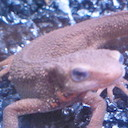

In [0]:
img = cv2.imread("imori.jpg")
cv2_imshow(img)

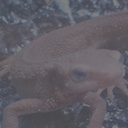

In [0]:
img_dark = cv2.imread("imori_dark.jpg")
cv2_imshow(img_dark)

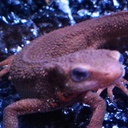

In [0]:
img_gamma = cv2.imread("imori_gamma.jpg")
cv2_imshow(img_gamma)

## Q21 ヒストグラム正規化

変換前ヒストグラム

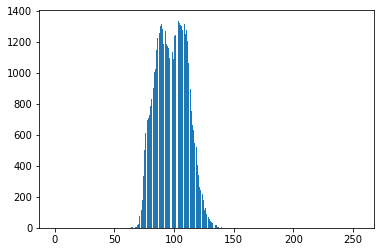

In [0]:
img_dark = cv2.imread("imori_dark.jpg").astype(np.float)

plt.hist(img_dark.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

In [0]:
np.min(img_dark)

60.0

In [0]:
np.max(img_dark)

141.0

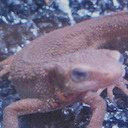

In [0]:
def normalize_histogram(img):
  c = np.min(img)
  d = np.max(img)
  a = 0
  b = 255
  out = img.copy()
  out[img < c] = a
  ind = np.where((img_dark >= c) & (img_dark < d))
  out[ind] = (out[ind] - c) / (d - c) * (b - a) + a
  out[img >= d] = b
  out = out.astype(np.uint8)
  return out

img_dark = cv2.imread("imori_dark.jpg")
out = normalize_histogram(img_dark)
cv2_imshow(out)

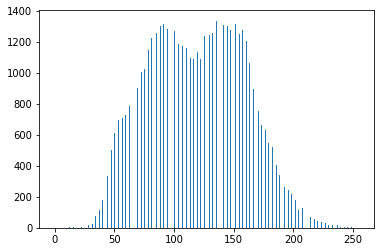

In [0]:
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

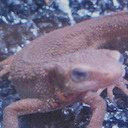

In [0]:
def hist_normalization(img, a=0, b=255):
	# get max and min
	c = img.min()
	d = img.max()

	out = img.copy()

	# normalization
	out = (b-a) / (d - c) * (out - c) + a
	out[out < a] = a
	out[out > b] = b
	out = out.astype(np.uint8)
	
	return out
img_dark = cv2.imread("imori_dark.jpg")
out = hist_normalization(img_dark)
cv2_imshow(out)

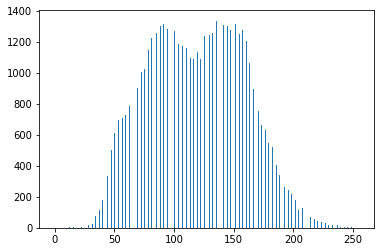

In [0]:
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

# Q22 ヒストグラム操作

平均値と標準偏差を操作する

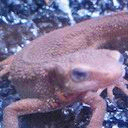

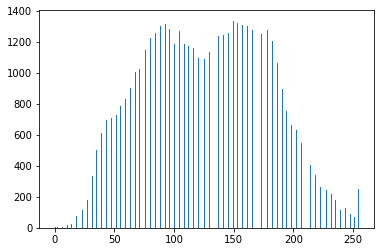

In [0]:
def histogram_manipuration(img, m0=128, s0=52):
  out = img.copy().astype(np.float)
  m = np.mean(out)
  s = np.std(out)
  out = s0/s * (out - m) + m0
  out = np.clip(out, 0, 255)
  return out.astype(np.uint8)

img_dark = cv2.imread("imori_dark.jpg")
out = histogram_manipuration(img_dark)
cv2_imshow(out)

plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

## Q23 ヒストグラム平坦化

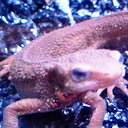

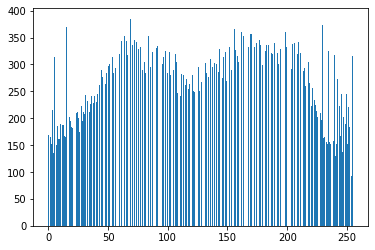

In [0]:
def histogram_equalization(img, z_max=255):
  out = img.copy()
  H, W, C = img.shape
  S = H * W * C * 1.
  sum_h = 0
  for i in range(0, 256):
    ind = np.where(img == i)
    sum_h += len(img[ind])
    z_prime = z_max / S * sum_h
    out[ind] = z_prime
  return out.astype(np.uint8)

img = cv2.imread("imori.jpg")
out = histogram_equalization(img)
cv2_imshow(out)

plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

## Q24 ガンマ補正

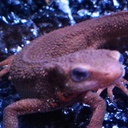

In [0]:
img_gamma = cv2.imread("imori_gamma.jpg")
cv2_imshow(img_gamma)

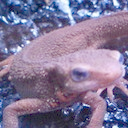

In [0]:
def gamma_correction(img, c=1.0, g=2.2):
  out = img.copy().astype(np.float)
  out /= 255.
  out = (1/c * out) ** (1/g)
  out *= 255
  return out.astype(np.uint8)
img_gamma = cv2.imread("imori_gamma.jpg")
out = gamma_correction(img_gamma)
cv2_imshow(out)

## Q25 再近傍補完


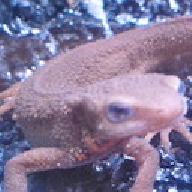

In [0]:
def interpolate_nn(img, ax=1.5, ay=1.5):
  H, W, C = img.shape
  Ha = int(H * ax)
  Wa = int(W * ay)
  y = np.arange(Ha).repeat(Wa).reshape(Wa, -1)
  x = np.tile(np.arange(Wa), (Ha, 1))
  y = np.round(y / ay).astype(np.int)
  x = np.round(x / ax).astype(np.int)

  out = img[y, x]
  out.astype(np.uint8)
  return out

img = cv2.imread("imori.jpg")
out = interpolate_nn(img)
cv2_imshow(out)

## Q26 Bi-linear 補完

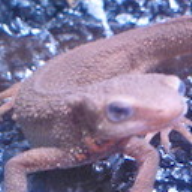

In [74]:
def interpolate_bl(img, ax=1.5, ay=1.5):
  H, W, C = img.shape

  Ha = int(H * ay)
  Wa = int(W * ax)
  
  y = np.arange(Ha).repeat(Wa).reshape(Wa, -1)
  x = np.tile(np.arange(Wa), (Ha, 1))

  y = (y / ay)
  x = (x / ax)

  ix = np.floor(x).astype(np.int)
  iy = np.floor(y).astype(np.int)

  ix = np.minimum(ix, W - 2)
  iy = np.minimum(iy, H - 2)
 
  dx = x - ix
  dy = y - iy

  dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
  dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)

  out = (1 - dx) * (1 - dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix + 1] + (1 - dx) * dy * img[iy + 1, ix] + dx * dy * img[iy + 1, ix + 1]
  out = np.clip(out, 0, 255)
  out = out.astype(np.uint8)

  return out

img = cv2.imread("imori.jpg")
out = interpolate_bl(img)
cv2_imshow(out)